In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta = np.linspace(0, 2 * np.pi, 150)
 
x_1 = 1 * np.cos(theta) + np.random.normal(loc = 0, scale = 0.25, size = 150)
y_1 = 1 * np.sin(theta) + np.random.normal(loc = 0, scale = 0.25, size = 150)

x_2 = 2.8 * np.cos(theta) + np.random.normal(loc = 0, scale = 0.25, size = 150)
y_2 = 2.8 * np.sin(theta) + np.random.normal(loc = 0, scale = 0.25, size = 150)

x_3 = 5 * np.cos(theta) + np.random.normal(loc = 0, scale = 0.25, size = 150)
y_3 = 5 * np.sin(theta) + np.random.normal(loc = 0, scale = 0.25, size = 150)

In [3]:
c_1 = np.concatenate((x_1.reshape([1, 150]), y_1.reshape([1, 150])), axis=0)
c_2 = np.concatenate((x_2.reshape([1, 150]), y_2.reshape([1, 150])), axis=0)
c_3 = np.concatenate((x_3.reshape([1, 150]), y_3.reshape([1, 150])), axis=0)
d = np.concatenate([c_1, c_2, c_3], axis = 1).T

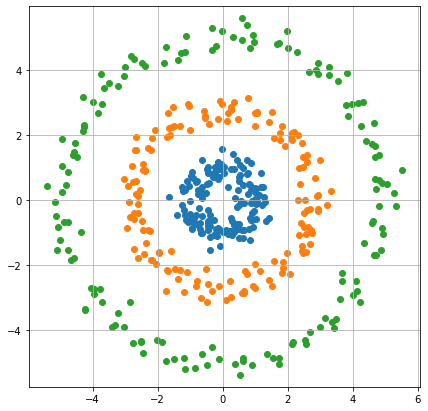

In [4]:
plt.figure(figsize = (7, 7))
plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)
plt.scatter(x_3, y_3)
plt.axis('equal')
plt.grid()
plt.show()

# Q1: KMeans

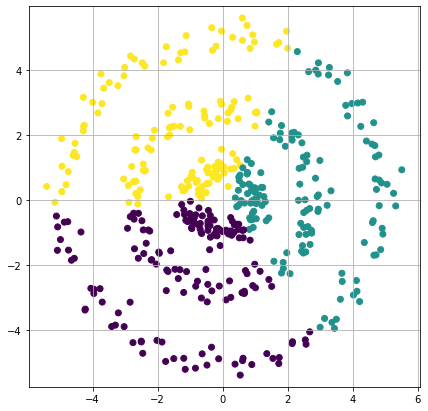

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3).fit(d)

plt.figure(figsize = (7, 7))
plt.scatter(d[:,0], d[:,1], c = kmeans.labels_)
plt.axis('equal')
plt.grid()
plt.show()

# Q2: Graph Laplacian

In [25]:
from sklearn.neighbors import kneighbors_graph
similarity_matrix = np.array(kneighbors_graph(X = d, n_neighbors = 10, mode = 'distance', metric = 'minkowski', p = 2))
adjacency_matrix = (1 / 2) * (similarity_matrix + similarity_matrix.T)

In [26]:
non_zero = adjacency_matrix != 0
adjacency_matrix[non_zero] = np.exp(-adjacency_matrix[non_zero] / (2 * np.square(0.5)))

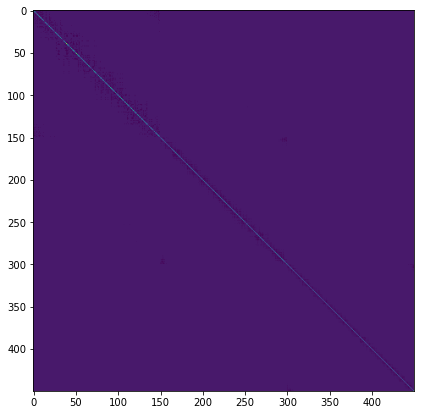

In [28]:
from scipy import sparse
graph_laplacian = sparse.csgraph.laplacian(csgraph = adjacency_matrix).toarray()
plt.figure(figsize = (7, 7))
plt.imshow(graph_laplacian)
plt.show()

# Q3: Feature Matrix and KMeans Clustering

In [31]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)
eigenvals = np.real(eigenvals)
eigenvcts = np.real(eigenvcts)


eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

eigenvals_sorted_indices = np.argsort(eigenvals)
indices = eigenvals_sorted_indices[1: 3]

feature_matrix = eigenvcts[:, indices]

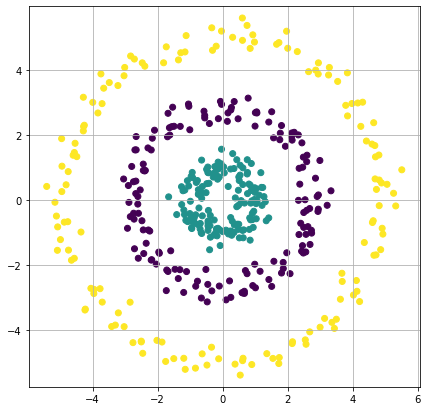

In [32]:
kmeans_spectral = KMeans(n_clusters = 3).fit(feature_matrix)

plt.figure(figsize = (7, 7))
plt.scatter(d[:,0], d[:,1], c = kmeans_spectral.labels_)
plt.axis('equal')
plt.grid()
plt.show()